## Simple Linear Regression

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
# read the dataset
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

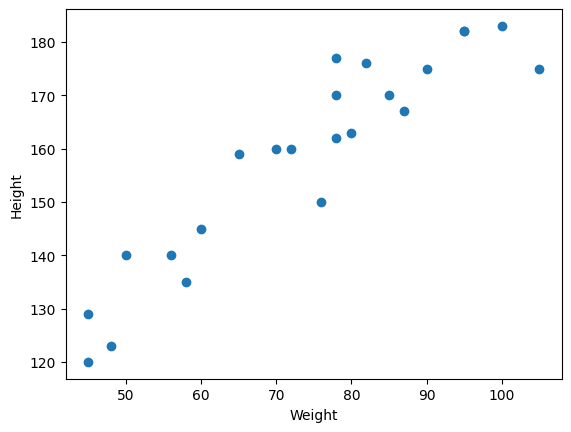

In [93]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [94]:
# divide our dataset into independent and dependent features
X = df[['Weight']] # independent features
y = df["Height"] # dependent features

In [95]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [96]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [99]:
X.shape

(23, 1)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [101]:
# Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)


[[ 1.73689094]
 [-0.92026952]
 [ 1.4542143 ]
 [ 0.21043706]
 [-1.48562281]
 [ 1.17153765]
 [-1.6552288 ]
 [-0.80719886]
 [-0.24184557]
 [ 0.0973664 ]
 [-1.37255215]
 [-1.03334018]
 [-0.12877492]
 [ 0.88886101]
 [ 0.43657837]
 [ 0.60618436]
 [ 0.71925502]
 [ 0.32350772]]
[[ 0.21043706]
 [ 0.21043706]
 [-1.6552288 ]
 [ 1.17153765]
 [-0.52452222]]


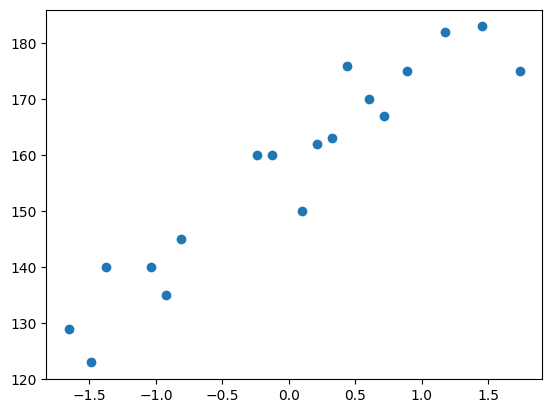

In [102]:
plt.scatter(X_train,y_train)

In [103]:
# train the model using simple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [107]:
print("The slope or coefficinet of weight is: ", regressor.coef_)
print("intercept: ", regressor.intercept_)

The slope or coefficinet of weight is:  [17.03440872]
intercept:  157.5


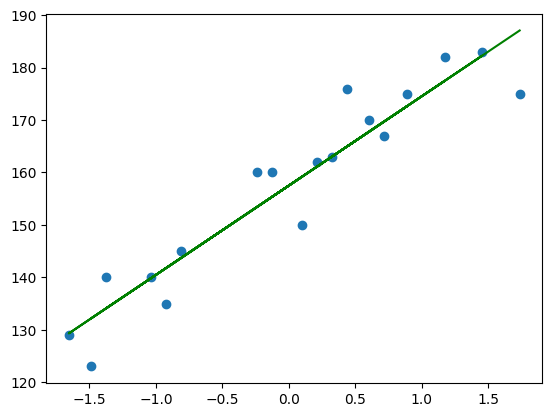

In [109]:
plt.scatter(X_train, y_train)
plt.plot(X_train,regressor.predict(X_train),'g')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [112]:
y_pred_test = regressor.predict(X_test)

In [113]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

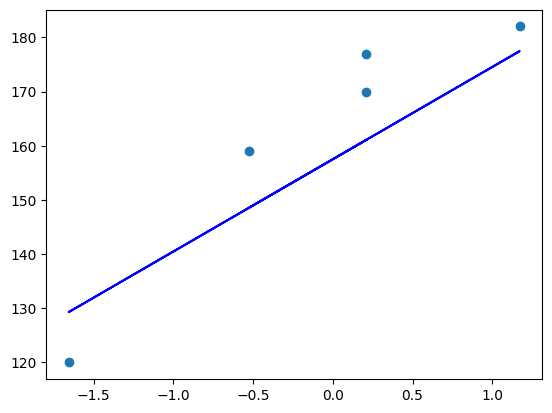

In [114]:
plt.scatter(X_test, y_test)
plt.plot(X_test,regressor.predict(X_test),'b')

## Performance matrix
- #### MSE, MAE, RMSE
- #### R square and adjusted R square


In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [117]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [118]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [119]:
score

0.776986986042344

### Adjusted R Square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [120]:
# display adjusted r-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [121]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\91891\OneDrive\Desktop\loki\IISc\Data Science\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [125]:
scaled_weight[0]

array([0.32350772])

In [126]:
print("The height prediction for weight of 80 kg is : ",regressor.predict([scaled_weight[0]]))

The height prediction for weight of 80 kg is :  [163.01076266]


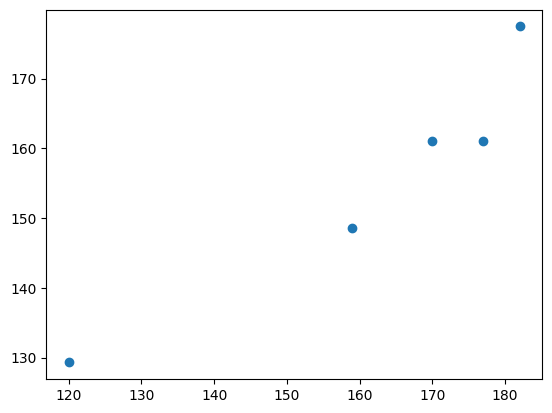

In [127]:
# Assumption
# plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)

In [128]:
# Residuals
residuals = y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\91891\AppData\Local\Temp\ipykernel_33248\642139566.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

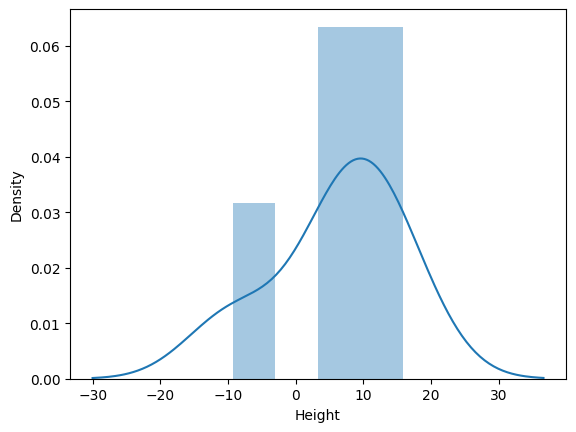

In [131]:
# plot this residuals
import seaborn as sns
sns.distplot(residuals, kde=True)

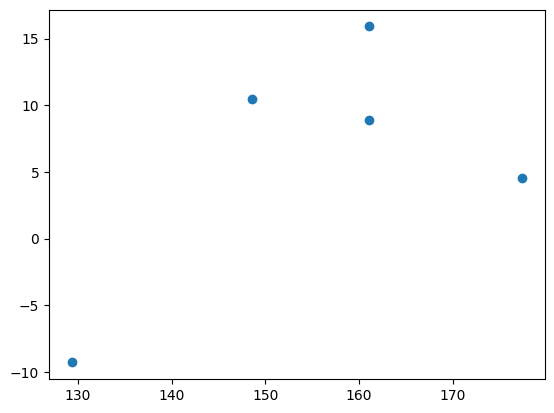

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test, residuals)